In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Projeto 1 - Ciência dos dados

## Países com alto IDH tem mais acesso a tecnologia?

##### Amanda Rufino

Para fazer essa análise serão utilizados os dados sobre IDH, quantidade de celulares (per 100) e indivíduos que usam internet (% da população), sendo que no dataframe, estão representados respectivamente por "2010_hdi", "2010_cell" e "2010_net". Além disso, após a exploração da relação no ano de 2010, também foi feita a comparação com a análise para o ano de 2015.

### Ano de 2010

In [16]:
dados_antes = pd.read_csv("dataframe_region.csv")
dados=dados_antes.set_index("Unnamed: 0")
dados.rename_axis("Paises")
dados.head()

,2010_cell,2010_net,2010_hdi,region
Unnamed: 0,,,,
Angola,40.238403,2.8,0.495,africa_sub_saharan
Albania,91.560929,45.0,0.738,europe_east
United Arab Emirates,132.105386,68.0,0.824,asia_west
Argentina,138.468979,45.0,0.816,america_south
Armenia,134.339110,25.0,0.729,europe_east


### Análise das Variáveis:

Com a análise das variáveis é possível perceber suas tendências e comportamentos.

count    157.000000
mean      87.881040
std       40.540361
min        4.219580
25%       55.050288
50%       92.378407
75%      117.062943
max      188.014965
Name: 2010_cell, dtype: float64

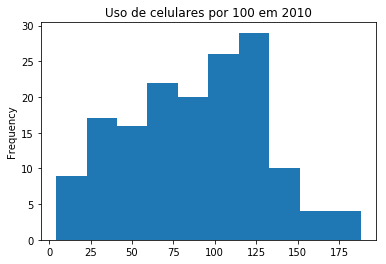

In [17]:
dados["2010_cell"].plot.hist(title="Uso de celulares por 100 em 2010");
dados["2010_cell"].describe()

Percebe-se que os dados sobre celular informam que a média e a mediana são próximas, o que pode ser observado também pelo histograma que apresenta um comportamento bastante uniforme das variáveis, indicando que a maioria dos valores está próxima do mesmo valor.

count    156.000000
mean      32.559858
std       27.696933
min        0.580000
25%        7.897500
50%       27.100000
75%       52.247500
max       93.390000
Name: 2010_net, dtype: float64

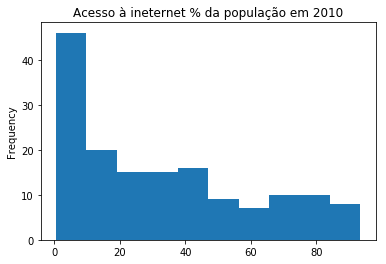

In [18]:
dados["2010_net"].plot.hist(title="Acesso à ineternet % da população em 2010");
dados["2010_net"].describe()

Percebe-se que a média e a mediana estão razoavelmente diferentes, o que também pode ser observado no histograma que está deslocado para a direita, indicando que os dados são distantes entre si, tendo uma concentração abaixo da média, visto que há valores altos que estão influenciando a média mas não são a maioria, pois não estão refletidos na mediana.

### Cruzamento de Variáveis

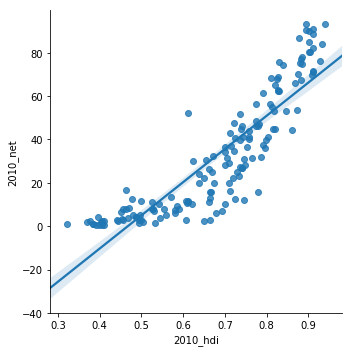

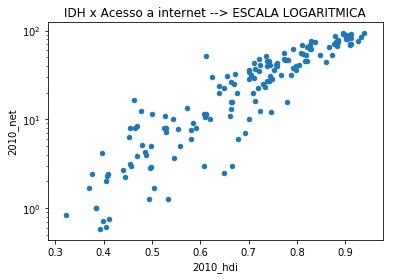

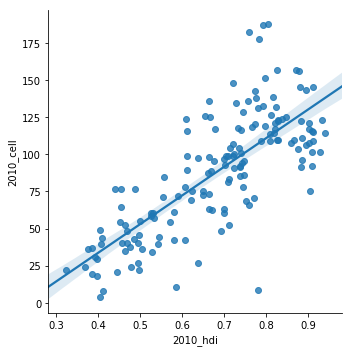

In [19]:
sns.lmplot(x="2010_hdi", y="2010_net", data=dados)
dados.plot.scatter(x="2010_hdi", y="2010_net", logy=True)
plt.title('IDH x Acesso a internet --> ESCALA LOGARITMICA')
sns.lmplot(x="2010_hdi", y="2010_cell", data=dados)


,2010_cell,2010_net,2010_hdi,log_net
2010_cell,1.000000,0.673066,0.760296,0.762261
2010_net,0.673066,1.000000,0.884213,0.876855
2010_hdi,0.760296,0.884213,1.000000,0.911423
log_net,0.762261,0.876855,0.911423,1.000000


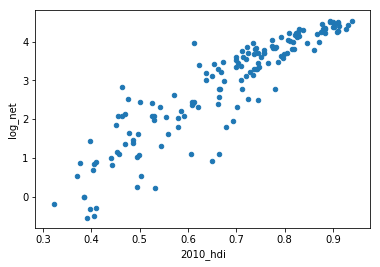

In [20]:
dados["log_net"]=np.log(dados["2010_net"])
dados.plot.scatter(x='2010_hdi', y="log_net")
dados.corr()

O gráfico de IHD por acesso à internet tem um acumulo de pontos na parte inicial (entre 0 e 0.6), de modo que o gráfico de IDH por acesso à internet em escala logarítmica auxilia a enxergar com maiores detalhes essa parte em que os pontos ficaram aglutinados, de modo que nessa escala, o índice de correlação entre essa variável e o IDH é de 0.91, o que demonstra que são fortemente correlacionadas

Pode se observar também que no cruzamento da variável de números de celulares per 100 com o IDH, há uma correlação, como visto no gráfico de dispersão junto com a reta de ajuste, no qual o valor do coeficinete de Pearson é de 0.76.

Logo, concluí-se que o IDH se relaciona tanto com o acesso à internet quanto com o número de celulares per cento, o que pode ocorrer devido ao fato de que a renda per capita faz parte do calculo do IDH, logo, países com renda per capita maiores, tem mais acesso à interntet e a celulares, e assim IDH mais altos tem numeros coincidentes com mais acesso à tecnologia.

### Ano de 2015

In [21]:
dados_antes = pd.read_csv("dataframe_region2015.csv")
dados=dados_antes.set_index("Unnamed: 0")
dados.rename_axis("Paises")
dados.head()

,2015_cell,2015_net,2015_hdi,region
Unnamed: 0,,,,
Angola,49.838042,12.400000,0.533,africa_sub_saharan
Albania,116.337513,63.252933,0.764,europe_east
United Arab Emirates,196.001399,90.500000,0.840,asia_west
Argentina,142.434810,68.043064,0.827,america_south
Armenia,118.770977,64.346030,0.743,europe_east


### Análise de Variáveis:

count    157.000000
mean     107.360665
std       36.309022
min        9.799925
25%       80.175272
50%      111.499580
75%      131.292828
max      196.001399
Name: 2015_cell, dtype: float64

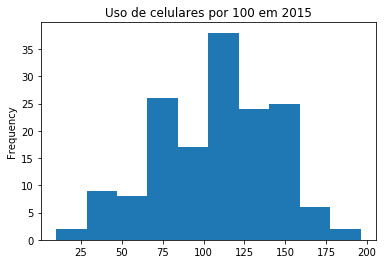

In [22]:
dados["2015_cell"].plot.hist(title="Uso de celulares por 100 em 2015");
dados["2015_cell"].describe()

Pode-se perceber que apesar dos dados comparadamente com de 2010 estão maiores, já que a média de 87.8, está em 107.3, ainda há bastante equilíbrio, estando a média e a mediana bem próximas, indicando a simetria dos dados e sua concentração nos valores centrais. 

count    156.000000
mean      47.011763
std       28.279749
min        1.083733
25%       21.407023
50%       48.661666
75%       70.095050
max       98.200000
Name: 2015_net, dtype: float64

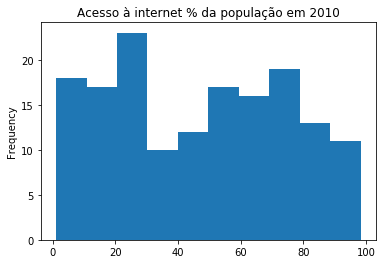

In [27]:
dados["2015_net"].plot.hist(title="Acesso à internet % da população em 2010");
dados["2015_net"].describe()

Diferentemente do observado no ano de 2010, neste histograma percebe-se um grande equilíbrio entre os dados, de modo que a assimetria observada não se conservou. Além disso, outro indicativo de que esses dados são equilibrados é a proximidade da média com a mediana que indicam que os dados se concentram em torno desse valor, que no caso é de 47.01 para a média e 48.66 para a mediana.

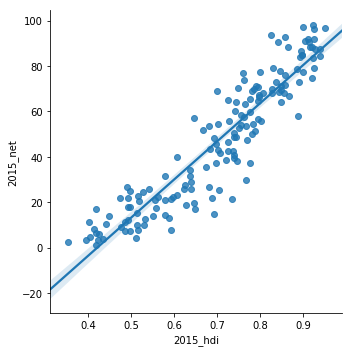

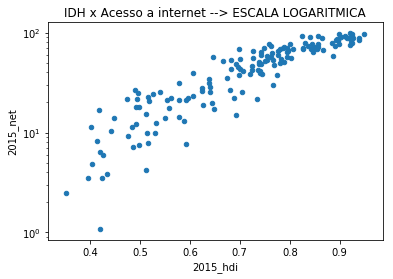

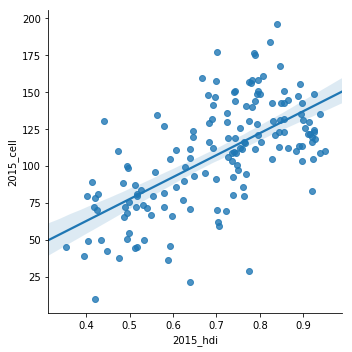

In [24]:
sns.lmplot(x="2015_hdi", y="2015_net", data=dados);
dados["log_net"]=np.log(dados["2015_net"])
dados.plot.scatter(x="2015_hdi", y="2015_net", logy=True);
plt.title('IDH x Acesso a internet --> ESCALA LOGARITMICA')
sns.lmplot(x="2015_hdi", y="2015_cell", data=dados);


In [25]:
dados.corr()

,2015_cell,2015_net,2015_hdi,log_net
2015_cell,1.000000,0.635429,0.633717,0.677016
2015_net,0.635429,1.000000,0.925165,0.916309
2015_hdi,0.633717,0.925165,1.000000,0.899157
log_net,0.677016,0.916309,0.899157,1.000000


Pode-se perceber que a correlação entre IDH e o número de celulares per 100 diminuíu de 0.76 para 0.63, de modo que apesar de ainda existir uma correlação, está está diminuindo com a temporalidade, o que é visto no gráfico pela dispersão dos pontos em relação a linha de correlação.

Além disso, o acesso à internt agora tem uma correlação bem mais explicíta já que pelo gráfico de dispersação é possível perceber a não necessidade do log para a análise das variáveis e além disso, a clara concentração dos pontos na linha de correlação, agora com valor de 0.92.

A partir disso, pode-se inferir que os dados dos celulares per 100 se tornaram mais equilibrados e assim sua correlação com o IDH ficou menor, o que pode ter ocorrido por causa da maior popularização dos aparelhos, fazendo com que o acesso não seja mais restrito a rendas altas. No entanto, o acesso a internet continua algo específico para os locais com IDH maior, e assim, para as regiões de alta renda.